In [1]:
#======================================================#
#     LAB 7 - MultiLayer Neural Network                #
#     Author: SHIKHAR ASTHANA                          #
#     Roll No. : 2K22/AFI/24                           #
#     Subject: ANN Lab (Anil Singh Parihar Sir)        #
#======================================================#

In [2]:
#Importing header files
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
#Using the shallow neural network for house price prediction
#Using the prebuild dataset - Boston Housing Dataset
boston = load_boston()
X = boston.data
y = boston.target

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

ERROR! Session/line number was not unique in database. History logging moved to new session 127


In [9]:
X[:1][0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [10]:
y[:1][0]

24.0

In [11]:
#Splitting the dataset into train test 
#Using 80 - 20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Applying standardization for the datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Building a sequential neural network model
#Using one hidden layer containing 32 neurons
#A ReLU activation function
#linear activation function in the output layer, as this is a regression problem
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='linear')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Defining generic loss functions, optimizers and metrics to be used by our model in training
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [16]:
#Actually training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_mae = model.evaluate(X_test, y_test)
print('Test MAE:', test_mae)

Train on 323 samples, validate on 81 samples
Epoch 1/50
323/323 [==============================] - 88s 271ms/sample - loss: 633.1669 - mean_absolute_error: 23.2152 - val_loss: 567.3916 - val_mean_absolute_error: 22.2601
Epoch 2/50
323/323 [==============================] - 0s 167us/sample - loss: 621.6893 - mean_absolute_error: 22.9114 - val_loss: 556.3381 - val_mean_absolute_error: 22.0030
Epoch 3/50
323/323 [==============================] - 0s 177us/sample - loss: 611.0029 - mean_absolute_error: 22.6886 - val_loss: 546.0729 - val_mean_absolute_error: 21.7605
Epoch 4/50
323/323 [==============================] - 0s 166us/sample - loss: 599.0236 - mean_absolute_error: 22.4035 - val_loss: 536.1155 - val_mean_absolute_error: 21.5213
Epoch 5/50
323/323 [==============================] - 0s 157us/sample - loss: 588.2475 - mean_absolute_error: 22.1771 - val_loss: 526.1942 - val_mean_absolute_error: 21.2761
Epoch 6/50
323/323 [==============================] - 0s 151us/sample - loss: 578.61

Epoch 48/50
323/323 [==============================] - 0s 94us/sample - loss: 136.8551 - mean_absolute_error: 9.2996 - val_loss: 85.7512 - val_mean_absolute_error: 7.4069
Epoch 49/50
323/323 [==============================] - 0s 91us/sample - loss: 124.8400 - mean_absolute_error: 9.1616 - val_loss: 81.7915 - val_mean_absolute_error: 7.1644
Epoch 50/50
102/102 [==============================] - 0s 65us/sample - loss: 71.3065 - mean_absolute_error: 6.8688
Test MAE: 6.868761


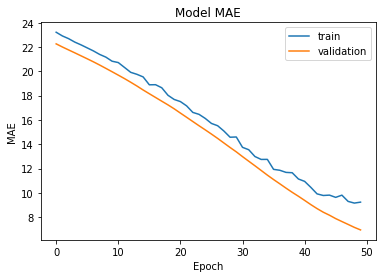

In [18]:
# Plot training history
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()